In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("cancer_patients.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# checking for balance of target variable
unique_values = df['Level'].value_counts()
print(unique_values)

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


In [4]:
# empty records?
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
# checking for categorical features
df.dtypes

#patient id and level are categorical

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [7]:
print(df.duplicated().sum())

0


In [ ]:
# There are no empty records and no dupliacted values but there are 2 categorical features.
# We will drop the id since it does not contribute to the prediction.
df = df.drop(['Patient Id'], axis=1)

df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
print(df['Level'].unique())

['Low' 'Medium' 'High']


In [13]:
# converting level to numerical
df['Level'] = df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [17]:
df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [18]:
print("Data types after conversion:", df.dtypes)

Data types after conversion: index                       int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object


In [19]:
# coorrelation matrix
corr_matrix = df.corr()
print(corr_matrix)

                             index       Age    Gender  Air Pollution  \
index                     1.000000  0.002674 -0.025739       0.053307   
Age                       0.002674  1.000000 -0.202086       0.099494   
Gender                   -0.025739 -0.202086  1.000000      -0.246912   
Air Pollution             0.053307  0.099494 -0.246912       1.000000   
Alcohol use               0.041374  0.151742 -0.227636       0.747293   
Dust Allergy              0.037960  0.035202 -0.204312       0.637503   
OccuPational Hazards      0.032355  0.062177 -0.192343       0.608924   
Genetic Risk              0.030725  0.073151 -0.222727       0.705276   
chronic Lung Disease      0.025177  0.128952 -0.205061       0.626701   
Balanced Diet             0.030743  0.004863 -0.099741       0.524873   
Obesity                   0.050584  0.034337 -0.123813       0.601468   
Smoking                   0.018407  0.075333 -0.206924       0.481902   
Passive Smoker            0.019517  0.004908 -0.184

Text(0.5, 1.0, 'Correlation Matrix')

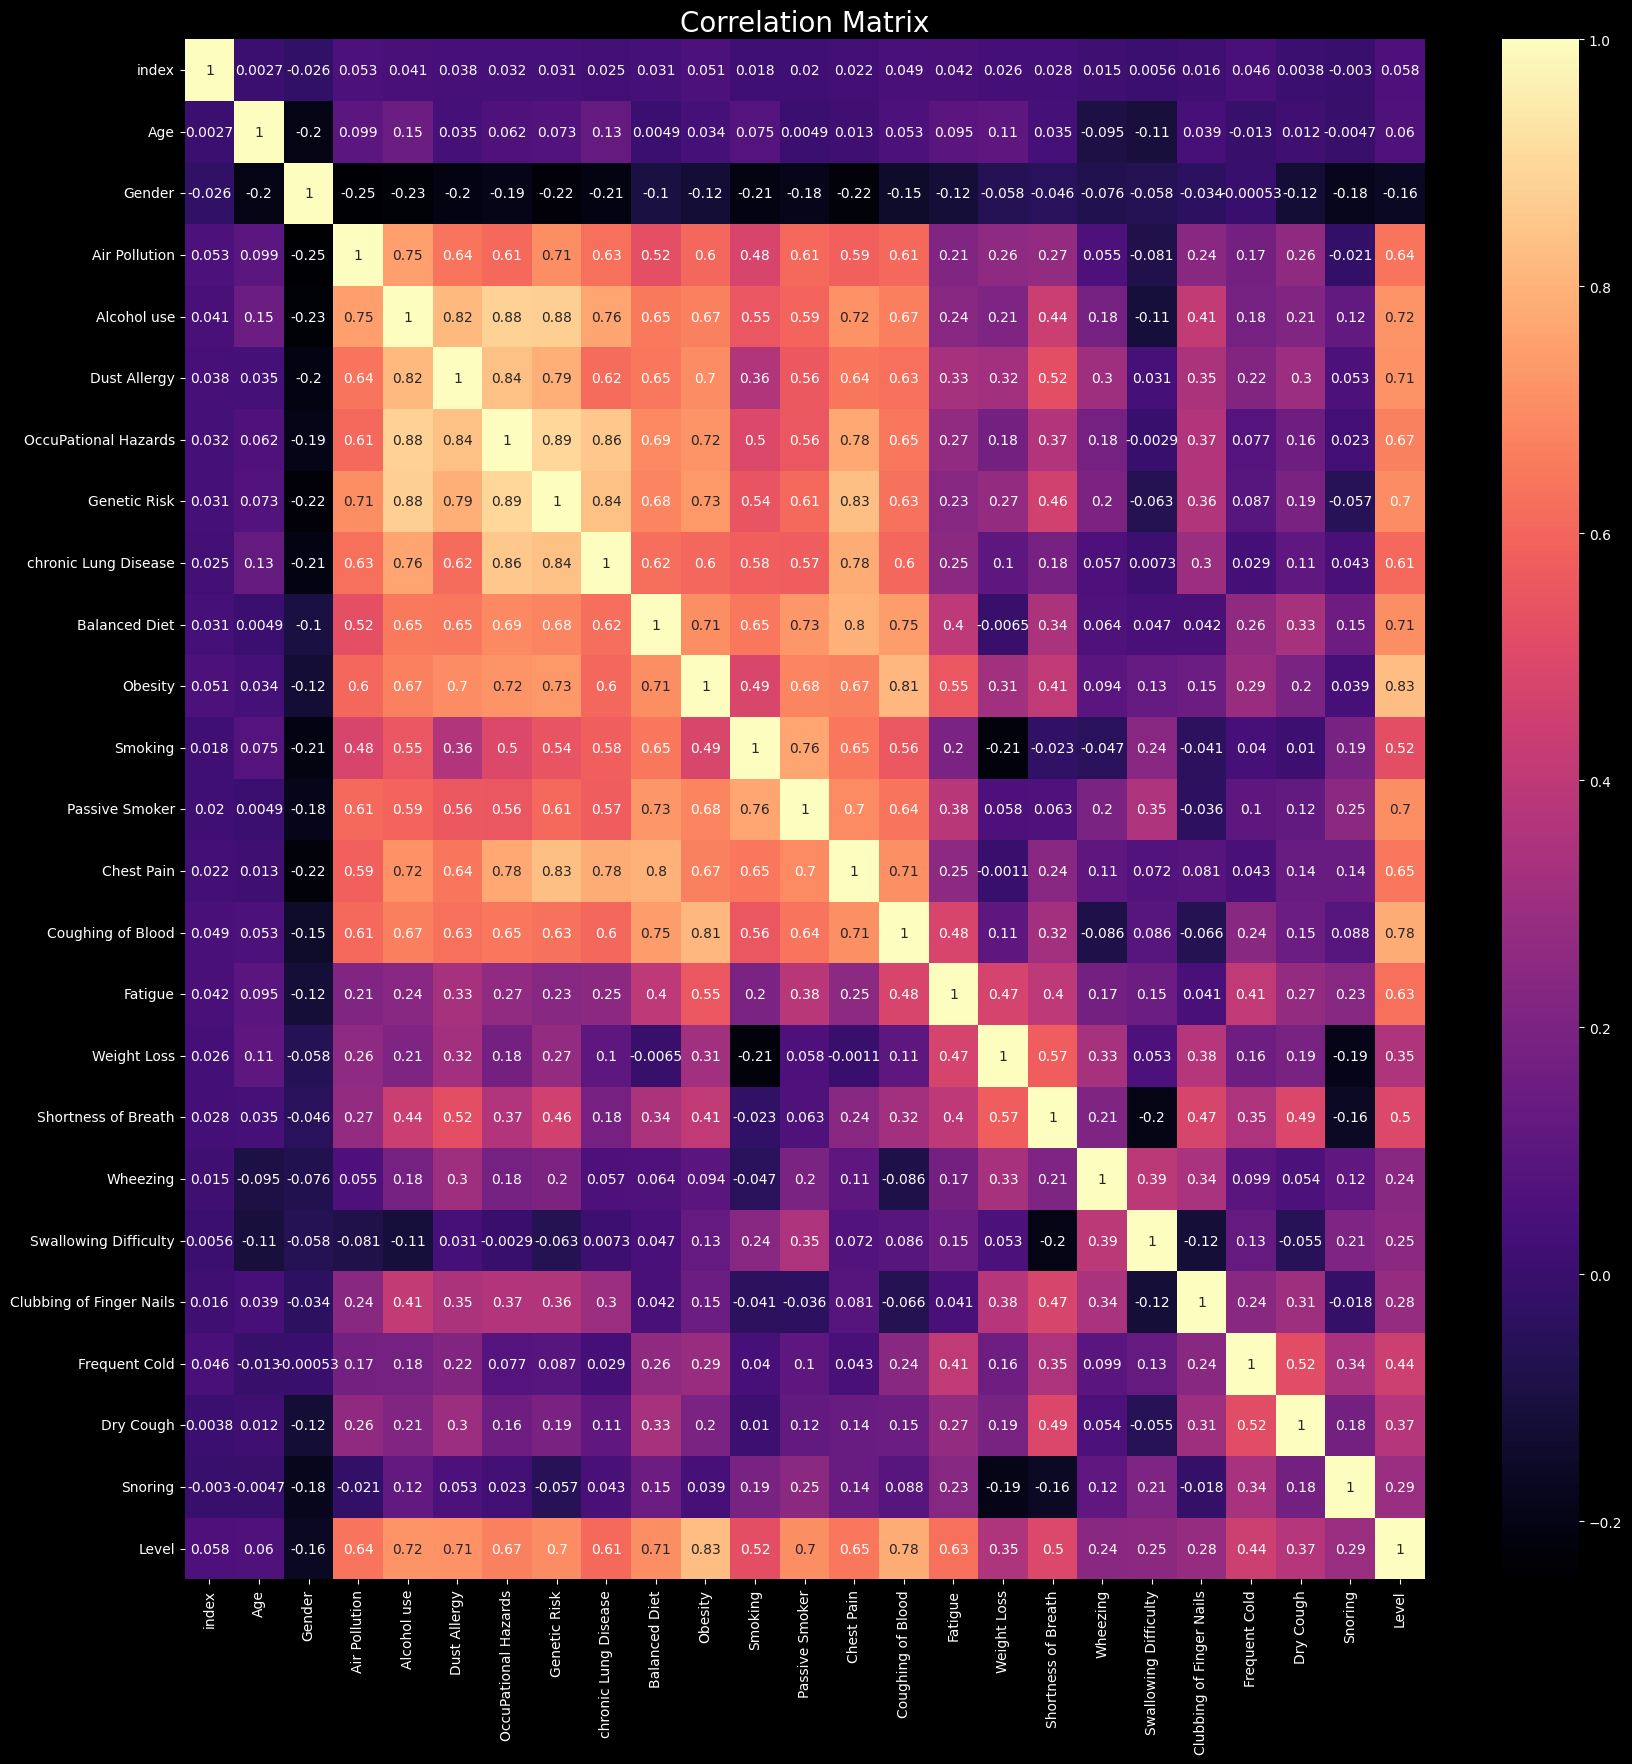

In [33]:
plt.style.use('dark_background')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix', fontsize=20)

In [ ]:
target_col = 'Level'     # Target column
threshold_target = 0.3    # Minimum correlation with target to keep
threshold_features = 0.8  # Max allowed correlation between features

# --- Step 1: Compute correlation matrix ---
corr_matrix = df.corr()  # Pearson correlation

# --- Step 2: Select features correlated with target ---
corr_with_target = corr_matrix[target_col].abs()  # Absolute correlation
# Keep features with correlation > threshold (excluding target itself)
selected_features = [f for f in corr_with_target.index if (f != target_col) and (corr_with_target[f] > threshold_target)]

print("Features selected based on correlation with target:")
print(selected_features)

# --- Step 3: Remove highly correlated features among themselves ---
final_features = []

for feature in selected_features:
    # Check if this feature is highly correlated with any already selected feature
    correlated = False
    for f in final_features:
        if abs(corr_matrix[feature][f]) > threshold_features:
            correlated = True
            break
    if not correlated:
        final_features.append(feature)

print("\nFinal features after removing multicollinearity:")
print(final_features)


In [34]:
#checking scalin needed or not
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Alcohol use'}>],
       [<Axes: title={'center': 'Dust Allergy'}>,
        <Axes: title={'center': 'OccuPational Hazards'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'chronic Lung Disease'}>,
        <Axes: title={'center': 'Balanced Diet'}>],
       [<Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Chest Pain'}>,
        <Axes: title={'center': 'Coughing of Blood'}>],
       [<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Weight Loss'}>,
        <Axes: title={'center': 'Shortness of Breath'}>,
        <Axes: title={'center': 'Wheezing'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>],


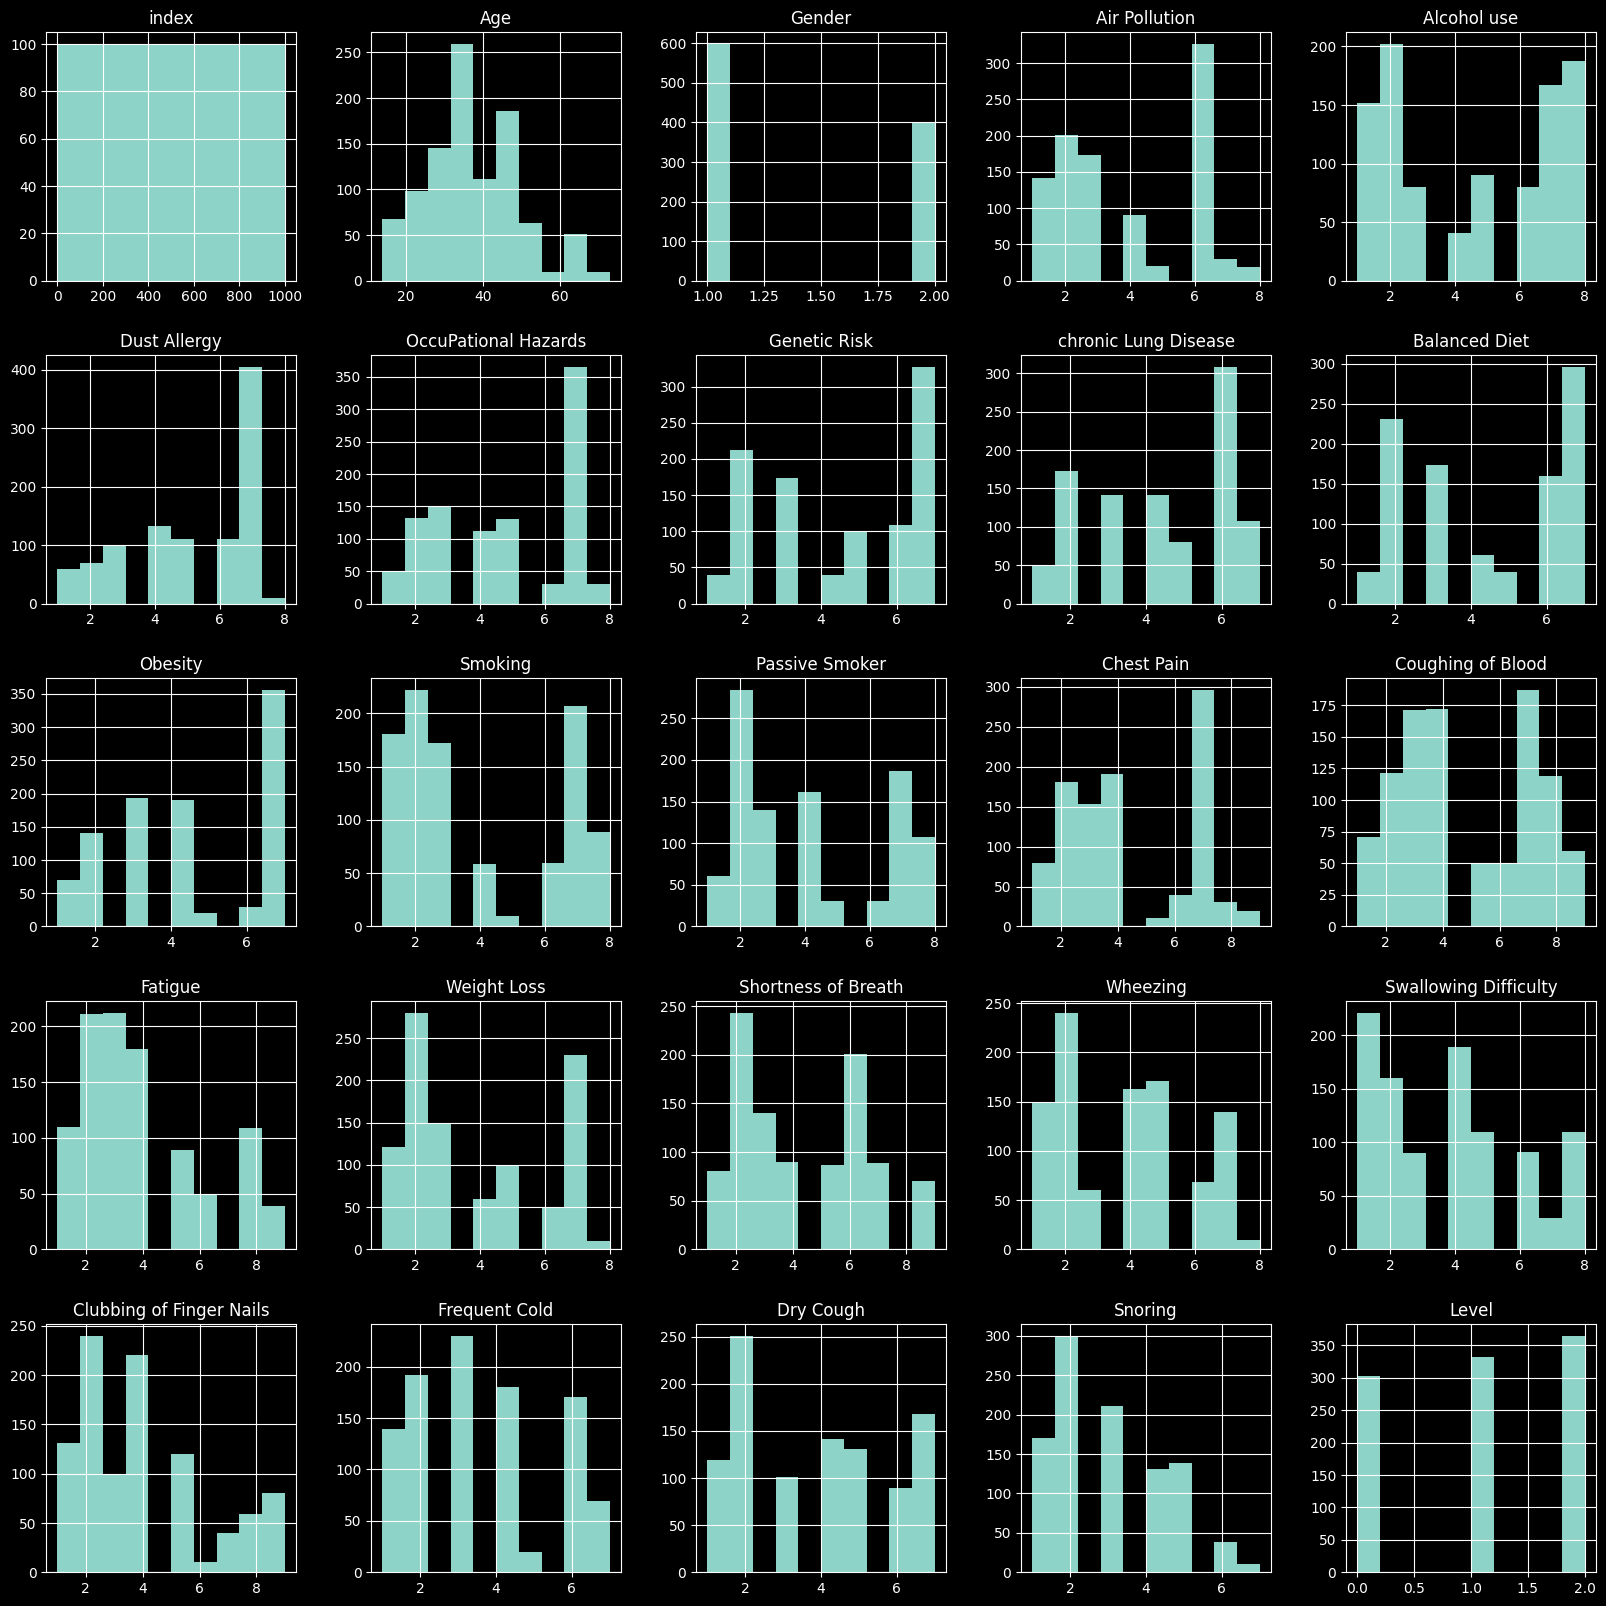

In [37]:
plt.style.use('dark_background')
df.hist(figsize=(20, 20), bins=10)

# doesnot seem like we should do scaling.
# but if doing on age it would be using satndard scaler
 

In [38]:
x = df.drop(['Level'],axis=1)
y = df['Level']

y.head()

0    0
1    1
2    2
3    2
4    2
Name: Level, dtype: int64

In [40]:
#train test split
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, train_size=0.8 ,test_size=0.2, random_state=0)

# train validate(used for hyperparameter tuning)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, train_size=0.7 ,test_size=0.3, random_state=0)

# Check sizes
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Testing set:", x_test.shape, y_test.shape)

Training set: (560, 24) (560,)
Validation set: (240, 24) (240,)
Testing set: (200, 24) (200,)


In [43]:
dt = DecisionTreeClassifier(criterion='entropy')
modelDT = dt.fit(x_train, y_train)

In [44]:
y_pred = dt.predict(x_test)

In [46]:
# training accuracy
print("The training accuracy of the model is: ", dt.score(x_train, y_train)*100)
#testing accuracy
print("The testing accuracy of the model is: ", accuracy_score(y_test, y_pred)*100)

The training accuracy of the model is:  100.0
The testing accuracy of the model is:  100.0
